# 1.2d Geometric random walk

# importing shit

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

# defining geometric random walk function

In [25]:
μ = 0
σ = 0.2
N = 100

def GRW(μ, σ, N):
    X = np.random.randn(N)*σ + μ
    Y = np.cumsum(X)
    Z = np.exp(Y)
    return Z



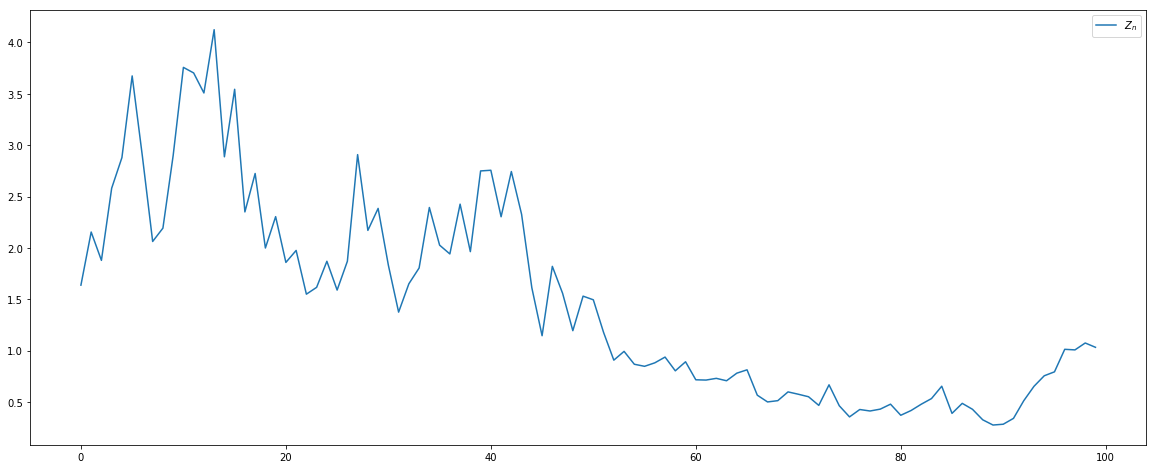

In [26]:
plt.figure(figsize = (20, 8))
plt.plot(range(tmax), GRW(0, 0.2, 100), label = r'$Z_n$')
plt.legend()

# calculating empirical average

In [27]:
def empav(realisations, μ, σ, N):
    raw = np.zeros(shape = (N, realisations))
    for i in range(realisations):
        raw[:, i] = GRW(μ, σ, N)
    averages = np.zeros(N)
    for i in range(N):
        averages[i] = (1/realisations)*np.sum(raw[i, :])
    deviation = np.std(raw, axis = 1)
    return [raw, averages, deviation]

# plotting empirical averages as a function of time n

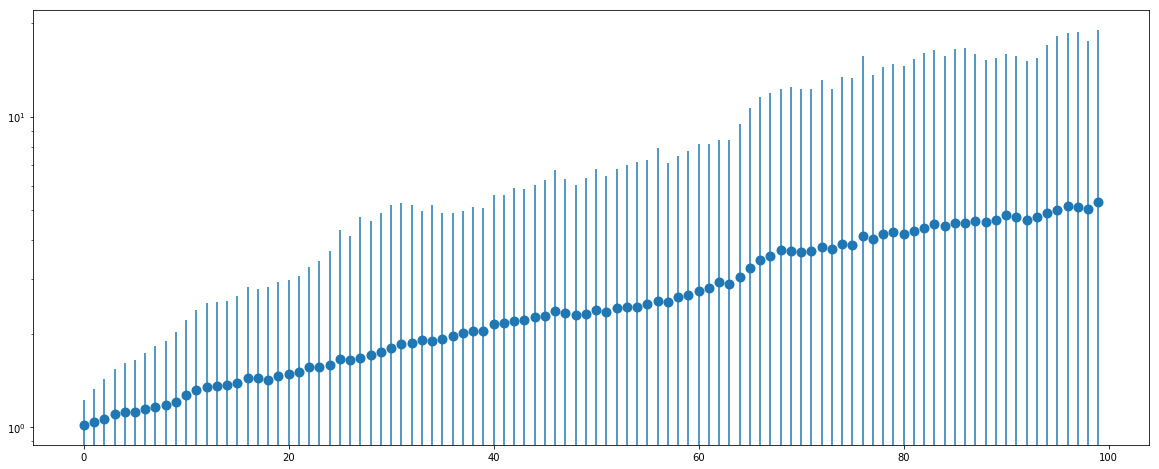

In [32]:
realisations = 500
μ = 0
σ = 0.2
N = 100
raw, empaverages, deviation = empav(realisations, μ, σ, N)
plt.figure(figsize = (20, 8))
plt.errorbar(range(N), y = empaverages, yerr = deviation, fmt = 'o', mew = 4)
plt.yscale("log")

# theoretical pdf

In [70]:
def pdfz(μ, σ, n, spaces):
    zs = np.linspace(0.01, n, spaces)
#     print(zs)
    theoretical = np.zeros(len(zs))
    theoretical = [(np.exp(-(np.log(i)-n*μ)**2/(2*n*σ*σ)))/(i * σ * np.sqrt(2*n*np.pi)) for i in zs]
    return [zs, theoretical]


# at time n = 10
# produce box plot

(0, 5)

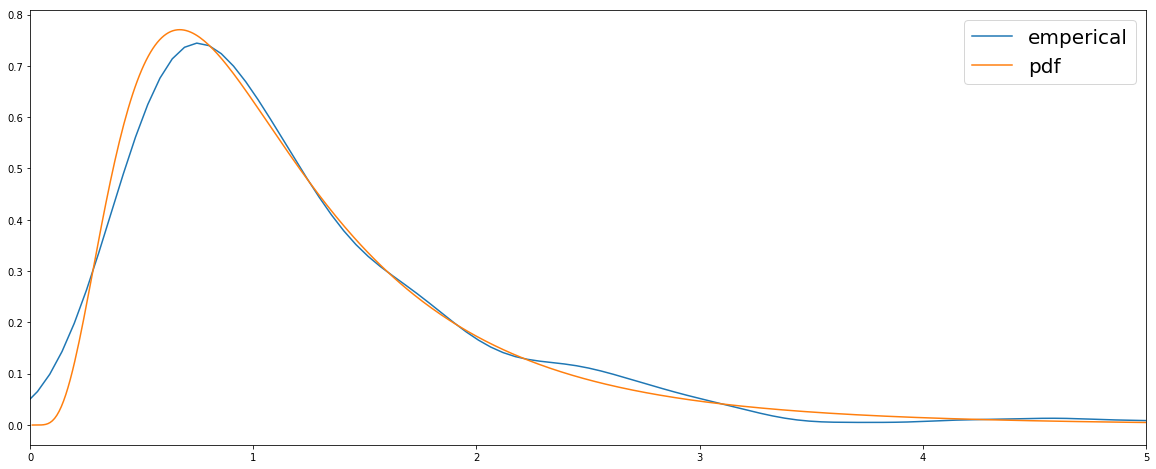

In [71]:
μ = 0
σ = 0.2
n = 10
spaces = 1000
realisations = 500
raw_10, empaverages_10, deviation_10 = empav(realisations, μ, σ, n)
data_10 = raw_10[n-1, :]
plt.figure(figsize = (20,8))
sns.kdeplot(data_10, label = "emperical")
zs_10, theoretical_10 = pdfz(μ, σ, n, spaces)
plt.plot(zs_10, theoretical_10, label = "pdf")
plt.legend(fontsize = 20)
plt.xlim([0, 5])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f361d814b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f361d80c208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f361d8149e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f361d80c898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f361d80cbe0>],
 'means': []}

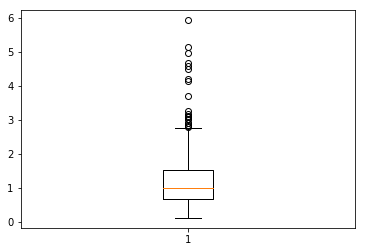

In [94]:
plt.boxplot(data_10)

# at time n = 100
# produce box plot

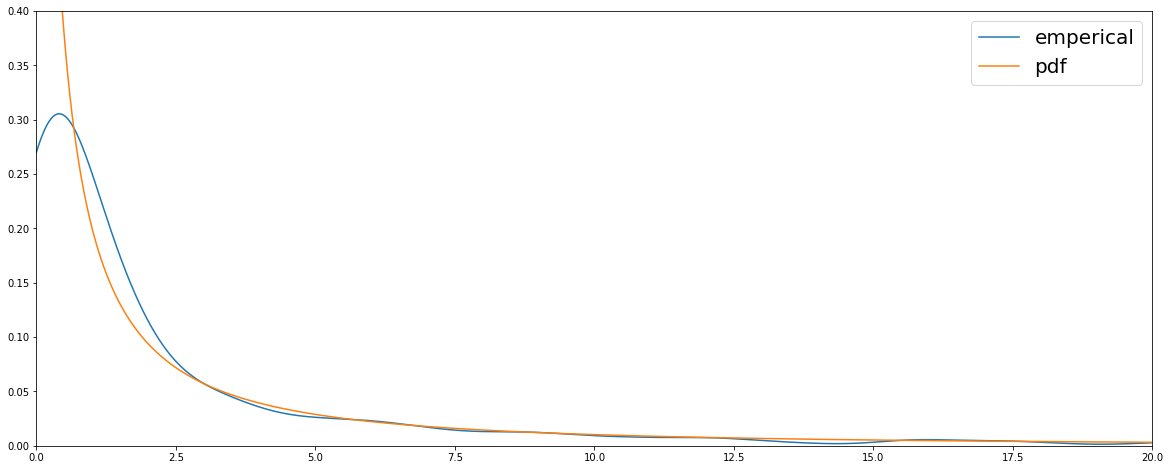

In [91]:
μ = 0
σ = 0.2
n = 100
spaces = 10000
realisations = 500
raw_100, empaverages_100, deviation_100 = empav(realisations, μ, σ, n)
data_100 = raw_100[n-1, :]
plt.figure(figsize = (20,8))
sns.kdeplot(data_100, label = "emperical", gridsize = 100000)
zs_100, theoretical_100 = pdfz(μ, σ, n, spaces)
plt.plot(zs_100, theoretical_100, label = "pdf")
plt.xlim([0, 20])
plt.ylim([0, 0.4])
plt.legend(fontsize = 20)
# plt.yscale("log")

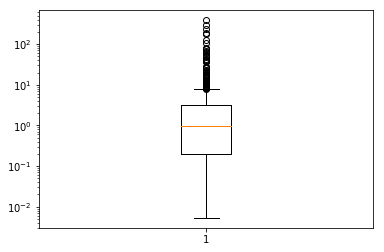

In [96]:
plt.boxplot(data_100)
plt.yscale("log")

# maybe do a local one to show the fluctuations 

# ergodic average for single realisation

In [64]:
μ = 0
σ = 0.2
N = 100

def ergav(μ, σ, N):
    ergaverages = np.zeros(N)
    ergcumsum = np.cumsum(GRW(μ, σ, N))
    for i in range(0, 100):
        ergaverages[i] = ergcumsum[i] / (i+1)
#     return ergaverages
    plt.figure(figsize = (20, 8))
    plt.plot(ergaverages, label = 'Ergodic average up to N =100')
    plt.legend(fontsize = 20)
    

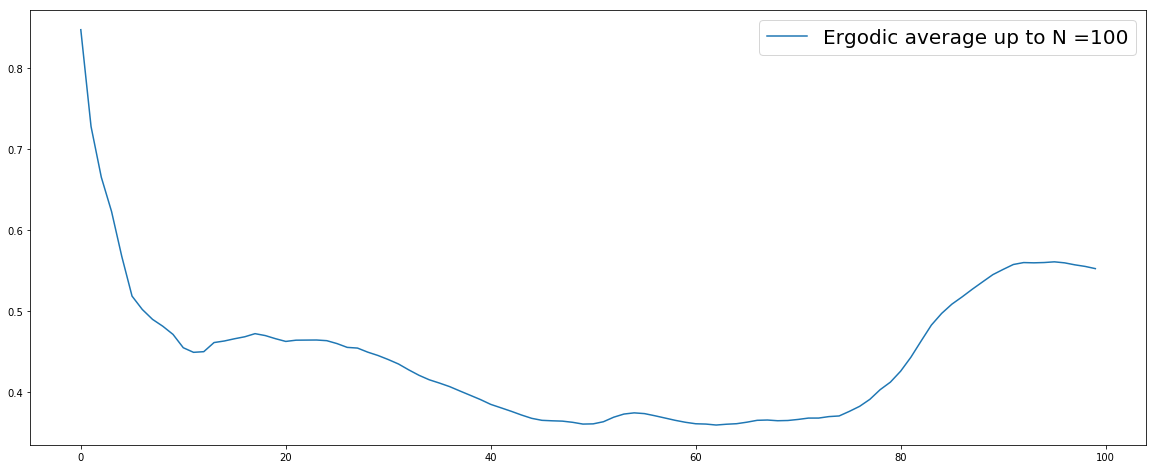

In [65]:
ergav(0, 0.2, 100)